# Лекция 1

## Конечно-разностные схемы. 
## Часть 3


<a id = "s_sec6"></a>
### 6. Уравнение адвекции

&nbsp; Идея конечно-разностного подхода для решения уравнений в частных производных опирается на методы аппроксимации производных, представленные в предыдущих частях данной лекции. В качестве примера мы будем рассматривать уравнение в частных производных *гиперболического типа* (более подробно о классификации уравнений в частных производных см. [Приложение 1](#s_app1)):

\begin{equation}
u_t = -a(x,t) \cdot u_x
\label{eq:wave_eq}
\end{equation}

где $a(x,t)$ - функция, характеризующая скорость переноса скалярной величины $u(x,t)$, величина $t$ представляет собой время, а $x$ - пространственную координату. 

&nbsp; Уравнение типа $\eqref{eq:wave_eq}$ называется *уравнением переноса* или *уравнением адвекции*. Нахождение численного решения уравнения такого типа представляет собой не простую и важную задачу вычислительной физики, так как оно встречается при моделировании широкого круга явлений в области геофизики, динамики газов, жидкостей и твердых тел, моделировании поведения плазмы, конвективного переноса тепла, концентраций примеси и других приложениях. На примере уравнения $\eqref{eq:wave_eq}$ удобно проиллюстрировать основне принципы построения конечно-разностных методов, проанализировать их свойства и ограничения. При этом, представленные ниже подходы применимы и к другим уравнениям в частных производных, что делает их достаточно универсальным инструментом решения вычислительных задач. 

&nbsp; В случае, если в уравнении $\eqref{eq:wave_eq}$ функция $a(x,t)$ равна постоянной величине $a$, уравнение называется *линейным* и для него можно построить аналитическое решение. Найдем это решение, оно пригодится нам далее для анализа численных результатов. Для этого выполним замену переменной: $\xi = x - a\cdot t$. Тогда используя обозначение $u(x,t) = U(\xi,t)$ мы можем получить следующие формы записи производной по пространству и времени:

\begin{equation*}
\frac{\partial u}{\partial t} = \frac{\partial U}{\partial \xi}\frac{\partial \xi}{\partial t} + \frac{\partial U}{\partial t}\frac{\partial t}{\partial t} = - a\frac{\partial U}{\partial \xi} + \frac{\partial U}{\partial t}
\label{eq:time_diff}
\end{equation*}

\begin{equation*}
\frac{\partial u}{\partial x} = \frac{\partial U}{\partial \xi}\frac{\partial \xi}{\partial x} + \frac{\partial U}{\partial t}\frac{\partial t}{\partial x} = \frac{\partial U}{\partial \xi}
\label{eq:space_diff}
\end{equation*}

&nbsp; Подстановка этих выражений в $\eqref{eq:wave_eq}$ преобразует его к обыкновенному дифференциальному уравнению:
\begin{equation*}
\frac{\partial}{\partial t} U(\xi,t) = 0
\label{eq:transform_wave_eq}
\end{equation*}

&nbsp; Отсюда можно заключить, что $U$ не может быть функцией времени, но может быть произвольной функцией $\xi$. Таким образом, общим решением $\eqref{eq:wave_eq}$ будет:
\begin{equation*}
u = f(x-at)
\label{eq:general_solution_wave_eq}
\end{equation*}
где $f$ - произвольная функция, вид которой определяется начальными и граничными условиями. Пусть решение ищется в интервале $(-\infty,\infty)$, а в качестве начального условия задана функция $u(x,0)=F(x)$. Тогда частным решением, удовлетворяющим начальному условию будет
\begin{equation*}
u = F(x-at)
\label{eq:solution_wave_eq}
\end{equation*}
&nbsp; Из данного решения можно видеть, что со временем вид функции $u(x,t)$ не меняется, а лишь переносится вправо (если $a>0$) со скоростью $a$.

&nbsp; К примеру, зададим начальное условие в виде гауссиана $F(x) = u_0 e^{-x^2}$. В таком случае, решением уравнения $\eqref{eq:wave_eq}$ будет:
\begin{equation*}
u(x,t) = u_0 e^{-(x-at)^2}
\label{eq:solution_ex_wave_eq}
\end{equation*}
&nbsp; Проиллюстрируем графически поведение решения в зависимости от $x$ и $t$:

<IPython.core.display.Javascript object>


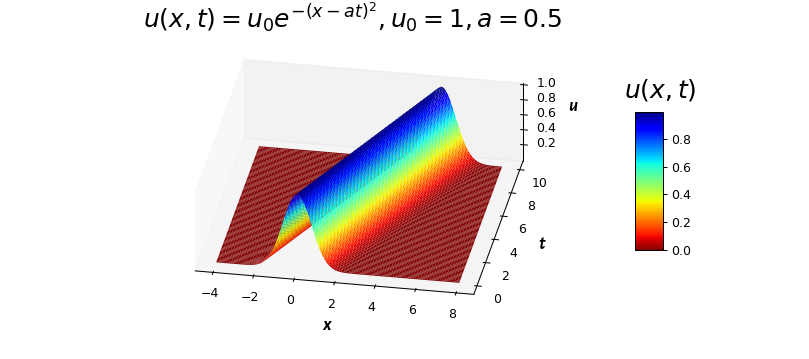

In [13]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(9, 4))
ax = plt.axes(projection='3d', proj_type = 'ortho')

ax.set_title('$u(x,t) = u_0 e^{-(x-at)^2}, u_0=1, a=0.5 $\n', fontsize = 20,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

ax.set_xlabel("\nx",fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_ylabel("t", rotation=0,fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_zlabel("u", rotation=0,fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.view_init(60, -80)

ax.grid(False)

u0 = 1.0
a = 0.5

x = np.linspace(-4, 8, 100)
t = np.linspace(0, 10, 100)

X, T = np.meshgrid(x, t)
U = u0*np.exp(-(X-a*T)**2)

surf = ax.plot_surface(X, T, U, rstride=1, cstride=1, edgecolor='none', cmap='jet_r')
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_label('$u(x,t)$', labelpad=-25, y=1.25, rotation=0, fontsize = 20,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')


&nbsp; Для анализа поведения функции $u(x,t)$ удобно воспользоваться так называемой *x-t диаграммой*, или тепловой картой $u(x,t)$ в координатах $x$ и $t$:

<IPython.core.display.Javascript object>


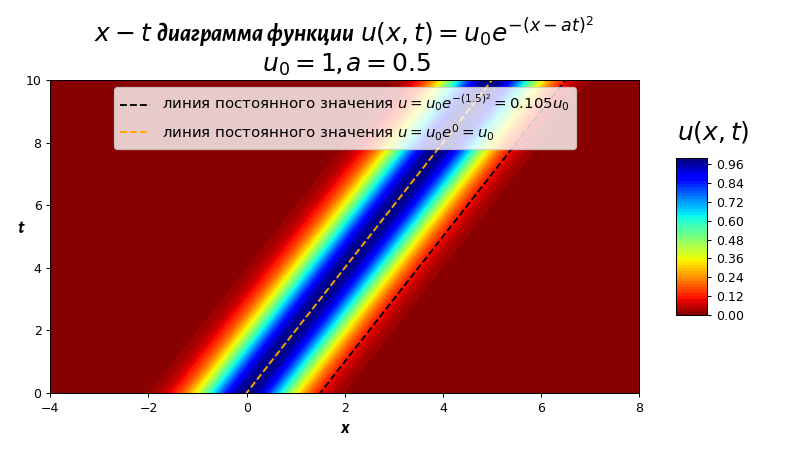

In [14]:
fig = plt.figure(figsize=(9, 5))
ax = plt.axes()

ax.set_title('$x-t$  диаграмма функции  $u(x,t) = u_0 e^{-(x-at)^2}$ \n $u_0=1$, $a=0.5$', fontsize = 20,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

ax.set_xlabel("x",fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_ylabel("t", rotation=0,fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
plt.tight_layout()

image = plt.contourf(X,T,U, cmap='jet_r', levels=50)
line = [0 for x in range(0,2)] 
t1 = 1/a*(x-1.5)
t2 = 1/a*x
line[0], = ax.plot(x, t1, color ='black',linestyle='--',label='линия постоянного значения $u = u_0 e^{-(1.5)^2}=0.105u_0$')
line[1], = ax.plot(x, t2, color ='orange',linestyle='--',label='линия постоянного значения $u = u_0 e^{0} = u_0$')

leg = plt.legend(handles=[line[0],line[1]], loc ="upper center", prop={'size': 12}) 

plt.ylim(0,10)

cbar = fig.colorbar(image, shrink=0.5, aspect=5)
cbar.set_label('$u(x,t)$', labelpad=-25, y=1.25, rotation=0, fontsize = 20,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

&nbsp; На тепловой карте выше цветом представлено распределение величины $u(x,t)$, а двумя штриховыми линиями  обозначены линии постоянного значения $u(x,t)$ для $u = 1$ и $u = 0.105$. Тангенс угла наклона линий равен $1/a$. Таким образом, прямые $t=\frac{1}{a}x$ или $x = at$ представляют собой линии постоянного значения $u(x,t)$. Данные линии называются *характеристиками* уравнения. Для уравнения $\eqref{eq:wave_eq}$ с постоянным коэффициентом $a$ характеристики представляют собой прямые.  

<a id = "s_sec7"></a>
### 7. Метод конечных разностей.

&nbsp; Для нахождения приближенного решения уравнений в частных производных конечно-разностным методом, используется дискретная система точек и так называемая *расчетная сетка*. Для уравнений, зависящих от одной пространственной координаты система точек представляет собой сетку в плоскости $(x,t)$. Шаг сетки по оси $x$ будем обозначать $\Delta x$, шаг сетки по оси $t$ - $\Delta t$. Таким образом, координата узла сетки на временном слое $n$ с пространственным индексом $i$ будет равна $(i \Delta x, n \Delta t)$. Приближенное решение ищется в узлах данной сетки. Приближенное решение в узле сетки с индексами $(i, n)$ будем обозначать как $u^n_i$.
&nbsp; Процесс построения конечно-разностных схем будем рассматривать также на примере линейного уравнения переноса: 

\begin{equation}
u_t = - a \cdot u_x
\label{eq:linear_wave_eq}
\end{equation}

&nbsp; На практике численнное решение уравнения $\eqref{eq:linear_wave_eq}$ имеет смысл искать в ограниченной области пространства и времени $(x,t) \in G = [0,L]\times[0,T]$. В таком случае, на границах расчетной области необходимо задать соответствующие условия: 

\begin{equation*}u(x,0)=\theta(x), x \in [0,L]\end{equation*} 
\begin{equation*}u(0,t)=\psi(t), t \in [0,T]\end{equation*} 
\begin{equation*}u(L,t)=\xi(t), t \in [0,T]\end{equation*}

&nbsp; В результате разбиения расчетной области на ячейки с шагом $\Delta x$ по пространству и $\Delta t$ по времени мы получим $N=L/\Delta x$ ячеек по пространству (число узлов сетки при этом на 1 больше) и $M=T/\Delta t$ ячеек по времени (см. [Рисунок 2](#figure2)). Пространственный индекс $i$ в таком случае пробегает значения от $0$ до $N$, а индекс временного слоя $n$ - от $0$ до $M$. 

&nbsp; Таким образом, задачу о решении уравния $\eqref{eq:linear_wave_eq}$ можно сформулировать так: пусть заданы значения функции $u$ в узлах сетки на начальном (нулевом) слое по времени и левой границе области:

\begin{equation*}u_i^0=\theta(x_i), i = 0,...,N \end{equation*} 
\begin{equation*}u_{-1}^n=\psi(t^n), n = 0,...,M \end{equation*}
\begin{equation*}u_{N+1}^n=\xi(t^n), n = 0,...,M \end{equation*}

Необходимо найти значения функции в последующие моменты времени $\Delta t, 2\Delta t, 3\Delta t, ...$ во всех узлах сетки.

<a id = "figure2"></a>

<img src="Pic2.jpg" alt="drawing" width="800"/>

<center> Рисунок 2. Конечно-разностная сетка в области $G = [0,L]\times[0,T]$. </center>

&nbsp; Существует несколько подходов к созданию конечно-разностных  аналогов дифференциального уравнения $\eqref{eq:linear_wave_eq}$. Простейший способ заключается в использовании конечно-разностного представления производных, входящих в уравнения. К примеру, производную по пространству можно заменить односторонними конечными разностями $D_+(x)$, $D_-(x)$ или центральной $D_0(x)$ конечной разностью (см. Часть 1). Аналогичным образом можно воспользоваться данными выражениями для нахождения производной по времени. К примеру, используя одностороннюю разность $D_-(x)$ для производной по пространству и $D_+(x)$ для производной по времени, получим следующий дискретный аналог дифференциальной задачи:
\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^n_i-u^n_{i-1}}{\Delta x}
\label{eq:simple_upwind_forward}
\end{equation}
&nbsp; Данная cхема называется схемой *левый уголок*. Её *шаблон* приведен на [Рисунке 3](#figure3)а. Шаблоном называется множество узлов расчетной сетки, используемых для построения разностного оператора.
Используя одностороннюю разность $D_+(x)$ для производной по пространству и $D_+(x)$ для производной по времени получим схему *правый уголок* ([Рисунок 3](#figure3)б):
\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^n_{i+1}-u^n_{i}}{\Delta x}
\label{eq:simple_upwind_backward}
\end{equation}

&nbsp; Нахождение численного решения уравнения $\eqref{eq:linear_wave_eq}$ на временном слое $n+1$ с помощью схемы $\eqref{eq:simple_upwind_forward}$ сводится к вычислению $u^{n+1}_i$ с использованием данных на предыдущем временном слое:

\begin{equation}
u^{n+1}_i = u^n_i - a \frac{\Delta t}{\Delta x}(u^n_i-u^n_{i-1})
\label{eq:sol_simple_upwind_forward}
\end{equation}

&nbsp; Схемы, в которых данные на новом временном слое $n+1$ можно найти только с использованием данных с предыдущего временного слоя $n$, называются *явными*. 

&nbsp; Заметим, что для вычисления $u^{n+1}_0$ нам необходимо использовать значение $u^n_{-1}$, которое мы будем определять из граничного условия $u^n_{-1}=\psi(t^n)$:
\begin{equation*}
u^{n+1}_0 = u^n_0 - a \frac{\Delta t}{\Delta x}(u^n_0-\psi(t^n))
\end{equation*}

&nbsp; Как будет показано ниже, при использовании схем типа уголок важно учитывать направление переноса. Так, использование схемы $\eqref{eq:simple_upwind_forward}$ возможно только в случае $a>0$, а схемы $\eqref{eq:simple_upwind_backward}$ - только в случае $a<0$. Учитывая это обстоятельство Курант, Изаксон и Рис предложили объединить эти две схемы [[1]](#foot1):

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^n_i-u^n_{i-1}}{\Delta x}, a \ge 0 \\
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^n_{i+1}-u^n_{i}}{\Delta x}, a < 0
\label{eq:CIR}
\end{equation}

&nbsp; Схема $\eqref{eq:CIR}$ называется схемой Куранта-Изаксона-Риса (CIR) или схемой с разностями против потока (upwind finite difference scheme). 

&nbsp; Если мы при выводе схемы $\eqref{eq:simple_upwind_forward}$ будем искать производную по пространству на слое $n+1$ вместо слоя $n$, мы получим схему 
\begin{equation}
\label{eq:implicit_simple_upwind}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^{n+1}_{i}-u^{n+1}_{i-1}}{\Delta x}
\end{equation}
шаблон которой изображен на [Рисунке 3](#figure3)в. 

&nbsp; В данной схеме не представляется возможным выразить $u^{n+1}_i$ через значения $u$ на временном слое $n$, так как в шаблон входит два узла на слое $n+1$. Такие схемы называются *неявными*, и для нахождения значений $u$ на новом временном слое $n+1$ требуется решить систему линейных уравнений. В матричной форме эту систему можно записать так:

\begin{equation}
\mathbf{A} \vec u^{n+1}=\vec u^n
\label{eq:matrix_simple_upwind}
\end{equation}

где
\begin{equation*}
\mathbf{A} = 
 \begin{pmatrix}
  1+С & 0 & \cdots & 0 \\
  -C & 1+С & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & -C & 1+С 
 \end{pmatrix}
\end{equation*}

\begin{equation*}
\vec u^{n+1} = 
 \begin{pmatrix}
  u^{n+1}_0 \\
  u^{n+1}_1 \\
  \vdots    \\
  u^{n+1}_N 
 \end{pmatrix}
\end{equation*}

\begin{equation*}
\vec u^{n} = 
 \begin{pmatrix}
  u^{n}_0 + C \psi(t^{n+1}) \\
  u^{n}_1 \\
  \vdots    \\
  u^{n}_N 
 \end{pmatrix} 
\end{equation*} 

&nbsp; Здесь $C=a\Delta t/\Delta x$ - безразмерный параметр, называемый также числом Куранта-Фридрихса-Леви (CFL). Граничное условие $u_{-1}^{n+1}=\psi(t^{n+1})$ включено в первое уравнение системы. Система $\eqref{eq:matrix_simple_upwind}$ представлет собой систему линейных уравнений (СЛАУ) относительно $\vec u^{n+1}$. В общем случае, неявные методы приводят к СЛАУ с разреженной матрицей $\mathbf{A}$ (sparse matrix) с ненулевыми элементами только в области диагонали матрицы. Для решения таких систем существует большое количество подходов, которые мы рассмотрим в последующих лекциях. Конкретно в случае схемы $\eqref{eq:implicit_simple_upwind}$ система решается довольно просто. Начиная с первого уравнения, в которое входит граничное условие мы можем последовательно вычислять $u_{0}^{n+1}, u_{1}^{n+1}, u_{2}^{n+1}$ и т.д. Схемы, где возможен такой последовательный расчет начиная с одной из границ области, называются схемами *бегущего счета*. К примеру, для расчета по неявной схеме $\eqref{eq:implicit_simple_upwind}$ можно построить следующую формулу для последовательного вычисления $u_{i}^{n+1}$:

\begin{equation}
u^{n+1}_i = \frac{u^n_i + Cu^{n+1}_{i-1}}{1+C}
\label{eq:seq_implicit_simple_upwind}
\end{equation}

&nbsp; При составлении схем можно комбинировать аппроксимацию производной с интерполяцией. К примеру, с использованием односторонней разности $D_+(x)$ можно составить следующую неявную симметричную схему бегущего счета (схема Карлсона ([Рис. 3](#figure3)г)):
\begin{equation}
\frac{1}{2}\left(\frac{u^{n+1}_i - u^n_i}{\Delta t} + \frac{u^{n+1}_{i-1} - u^n_{i-1}}{\Delta t} \right)= - \frac{a}{2}\left( \frac{u^{n+1}_{i}-u^{n+1}_{i-1}}{\Delta x} + \frac{u^n_{i}-u^n_{i-1}}{\Delta x}  \right)
\label{eq:Carlson}
\end{equation}

---

#### Задача 6
> а) Представьте схему Карлсона $\eqref{eq:Carlson}$ в матричном виде.  
> б) Выведите соотношение для последовательного нахождения $u_{i}^{n+1}$ по схеме Карлсона $\eqref{eq:Carlson}$ по аналогии с $\eqref{eq:seq_implicit_simple_upwind}$.

---

&nbsp; Используя центральную разность $D_0(x)$ при аппроксимации производной по пространству, получим явную симметричную схему, называемую также FTCS (Forward in Time Centered in Space([Рис. 3](#figure3)д)):

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^n_{i+1}-u^n_{i-1}}{2\Delta x}
\label{eq:FTCS}
\end{equation}

\begin{equation}
u^{n+1}_i = u^n_i - a \frac{\Delta t}{2\Delta x}(u^n_{i+1}-u^n_{i-1})
\label{eq:sol_FTCS}
\end{equation}

&nbsp; Наконец, производную по времени также можно аппроксимировать центральной разностью $D_0(t)$. В результате получим схему "крест" или leap-frog [Рис. 3](#figure3)е. 

\begin{equation}
\frac{u^{n+1}_i - u^{n-1}_i}{2\Delta t} = - a \frac{u^n_{i+1}-u^n_{i-1}}{2\Delta x}
\label{eq:leap_frog}
\end{equation}

\begin{equation}
u^{n+1}_i = u^n_{i-1} - a \frac{\Delta t}{\Delta x}(u^n_{i+1}-u^n_{i-1})
\label{eq:sol_leap_frog}
\end{equation}

&nbsp; В отличие от предыдущих схем, в шаблоне схемы "крест" задействованы узлы на трех временных слоях $n-1, n, n+1$. Таким образом, данная схема является *трехслойной*, а схемы полученные ранее - *двухслойными*.

<a id = "foot1"></a> <sub>[1]: Courant R., Isaacson E., Rees M. // Comm. Pure Appl. Math. 1952, 5 (3): 243-255. [doi:10.1002/cpa.3160050303](https://onlinelibrary.wiley.com/doi/abs/10.1002/cpa.3160050303).</sub>

<a id = "figure3"></a>

<img src="Pic3.jpg" alt="drawing" width="800"/>

<center> Рисунок 3. Шаблоны конечно-разностных схем для уравнения $\eqref{eq:linear_wave_eq}$. </center>

<a id = "s_sec8"></a>
### 8. Программная реализация конечно-разностных схем.

&nbsp; Перейдем теперь непосредственно к решению уравнения $\eqref{eq:linear_wave_eq}$ с помощью полученных конечно-разностных схем и проанализируем на практике их свойства. Начнем с разбиения области на расчетную сетку и создания функций для граничных и начальных условий.

In [16]:
import numpy as np

L = 10        # длина расчетной области
N = 500       # число ячеек по оси x
M = 351       # число временных шагов

x = np.linspace(0,L,N+1)   # массив координат узлов расчетной сетки (на 1 больше, чем ячеек)
u = np.zeros(N+1)          # массив значений u_n в узлах сетки
u_next = np.zeros(N+1)     # массив значений u_n в узлах сетки

delta_x = L/N              # размер пространственного шага сетки dx

def left_BC(t):            # процедура постановки ГУ на левой границе psi(t) = 0
    return(0)

def right_BC(t):           # процедура постановки ГУ на правой границе xi(t) = 0
    return(0)


&nbsp; Мы задали параметры пространственного разбиения ($\Delta x = L/N = 0.02$) и задали функции граничных условий `left_BC(t)` и `right_BC(t)`. Для примера использованы простейшие варианты граничных условий $\psi(t) = 0$ и $\xi(t) = 0$. В качестве начального условия зададим сумму двух гауссианов: $u(x,0) = e^{-\frac{(x-3)^2}{0.25}} + e^{-\frac{(x-4)^2}{0.25}}$. В таком случае, точное решение уравнения $\eqref{eq:linear_wave_eq}$: 

\begin{equation*}
u(x,t) = e^{-\frac{(x-3 - at)^2}{0.25}} + e^{-\frac{(x-4- at)^2}{0.25}}
\end{equation*}

&nbsp; Представим это решение в виде функции `exact_solution(x,t,a)`:

In [4]:
def exact_solution(x,t,a):
    sol = np.exp(-(x-3.0 - a*t)**2/(0.25)) + np.exp(-(x-4.0-a*t)**2/(0.25)) 
    return(sol)

&nbsp; Далее разработаем процедуры реализующие численное решение уравнения $\eqref{eq:linear_wave_eq}$ с использованием явных разностных схем, представленных выше $\eqref{eq:simple_upwind_backward}, \eqref{eq:FTCS}, \eqref{eq:leap_frog}$: 

In [5]:
def simple_upwind(lBc, rBc, u, u_next, u_prev, C, t):
    '''
    Решение линейного уравнения переноса с использованием явной схемы уголок (simple upwind)
    
    Параметры:
    lBc - процедура постановки ГУ на левой границе области
    rBC - процедура постановки ГУ на правой границе области
    u   - сеточное значение неизвестной функции u на временном шаге n 
    u_next   - сеточное значение неизвестной функции u на временном шаге n+1
    u_prev   - сеточное значение неизвестной функции u на временном шаге n-1
    C   - число CFL
    t   - момент времени tn        
    '''
    
    for i in range(len(u)-1):
        if(i-1==0):
            u[i-1] = lBc(t)
        if(i+1==len(u)-1):
            u[i+1] = rBc(t)
        u_next[i] = u[i] - C*(u[i] - u[i-1])
        
def FTCS(lBc, rBc, u, u_next, u_prev, C, t):
    '''
    Решение линейного уравнения переноса с использованием явной схемы FTCS
    '''    
   
    for i in range(len(u)-1):
        if(i-1==0):
            u[i-1] = left_BC(t)
        if(i+1==len(u)-1):
            u[i+1] = right_BC(t)           
        u_next[i] = u[i] - 0.5*C*(u[i+1] - u[i-1])   
        
def leap_frog(lBc, rBc, u, u_next, u_prev, C, t):
    '''
    Решение линейного уравнения переноса с использованием явной схемы "крест" (leap frog)
    '''    
    
    for i in range(len(u)-1):
        if(i-1==-1):
            u[i-1] = left_BC(t)
        if(i+1==len(u)-1):
            u[i+1] = right_BC(t)           
        u_next[i] = u_prev[i] - C*(u[i+1] - u[i-1])   

&nbsp; Отметим, что при реализации алгоритмов мы везде в качестве входного аргумента использовали `u_prev`, хотя для расчета значение $u^{n-1}$ необходимо лишь в случае трехслойной схемы "крест". Это сделано для того, чтобы у всех процедур был одинаковый набор входных параметров. Это позволит нам работать далее с этими процедурами в едином ключе. 

&nbsp; В следующей ячейке кода реализуем неявные алгоритмы $\eqref{eq:implicit_simple_upwind},\eqref{eq:Carlson}$. Мы не будем применять здесь формулы бегущего счета для последовательного вычисления неизвестных. Вместо этого, продемонстирируем как генерируются матрица неявного метода и правая часть и решается соответствующая СЛАУ. Использование уже известной нам процедуры **NumPy** `linalg.solve` - не самый эффективный подход к решению СЛАУ, однако на данном этапе мы не будем рассматривать более быстрые алгоритмы. Учитывая что для решения СЛАУ необходимы дополнительные инструменты, по быстродействию неявные методы обычно уступают явным, однако обладают другими преимуществами, о которых мы поговорим позже.

In [6]:
def implicit_euler(lBc, rBc, u, u_next, u_prev, C, t):
    
    n = len(u)
    A = [[0 for x in range(n)] for y in range(n)] 
    b = [0 for x in range(n)]
    for i in range(0,n):
        for j in range (0,n):
            if(i==j):
                A[i][j] = (1+C)
            if(i==j+1):
                A[i][j] = -C
                
    for i in range(0,n):
        if(i==0):
            b[i] = (u[i] + C*left_BC(t)) 
        else:
            b[i] = u[i]
    
    c = np.linalg.solve(A, b)

    for i in range(0,n):
        u_next[i] = c[i]
        
def implicit_carlson(lBc, rBc, u, u_next, u_prev, C, t):
    
    n = len(u)
    A = [[0 for x in range(0,n)] for y in range(0,n)] 
    b = [0 for x in range(0,n)]
    for i in range(0,n):
        for j in range (0,n):
            if(i==j):
                A[i][j] = (1+C)
            if(i==j+1):
                A[i][j] = (1-C)

    for i in range(0,n):
        if(i==0):
            b[i] = ((1-C)*u[i] - (1-C)*left_BC(t) + (1+C)*left_BC(t)) 
        else:
            b[i] = ((1+C)*u[i-1]+(1-C)*u[i]) 

    c = np.linalg.solve(A, b)

    for i in range(0,n):
        u_next[i] = c[i]

        
        

&nbsp; Для нахождения решения и его визуализации используем следующую процедуру `visualize`:

In [7]:
def visualize(scheme,scheme_name, x, M, delta_t, C, a):
    
    '''
    Процедура visualize выполняет итерации по времени для заданной разностной схемы
    
    scheme       - процедура реализующая схему
    scheme_name  - название схемы 
    M            - число итраций по времени
    delta_t      - шаг по времени dt
    '''

    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(9, 4))
    ax.set_title('Схема '+scheme_name+', число CFL =' + str(C) + ' шаг по времени ' + str(delta_t), fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    ax.set_ylabel("u",rotation=0 ,fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    ax.set_xlabel("x",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    plt.xlim(-1,11)
    plt.tight_layout()
    
    t = 0.0
    u_init = exact_solution(x,0.0,a)    # начальное условие u(x,0)
    u      = u_init.copy()              # начальные значения u_n, u_{n+1}, u_{n-1} задаем такими же как u(x,0)
    u_next = u_init.copy()
    u_prev = u_init.copy()
    
    line1, = ax.plot(x, u_init, linewidth=4, color="Green", label = 'начальное условие')
    
    for n in range(1,M):                # цикл итераций по времени
        
        scheme(left_BC, right_BC, u, u_next, u_prev, C, t)   # расчет по схеме
        
        if (n%70 == 0):
            line3, = ax.plot(x, u_next, linewidth=4, color = "Blue", alpha=1/M*n, label = 'численное решение')
            line2, = ax.plot(x, exact_solution(x,t,a), linewidth=2, color = "Black", alpha=1/M*n, label = 'точное решение')
        
        u_prev = u.copy()               # запись значений u_{n} в u_{n-1}
        u = u_next.copy()               # запись значений u_{n+1} в u_{n}
         
        t = t + delta_t                 # увеличиваем t на dt в конце итерации
        
    leg = ax.legend(handles=[line1,line2,line3], loc ="upper left", prop={'size': 12}) 

&nbsp; Процедура `visualize` может работать со всеми реализациями численных схем, которые мы ранее разработали. Зададим параметры $C$, $a$ проведем расчет $\Delta t = \frac{C \Delta x}{a}$ и выполним решение уравнения $\eqref{eq:linear_wave_eq}$ с использованием явных схем:

<IPython.core.display.Javascript object>


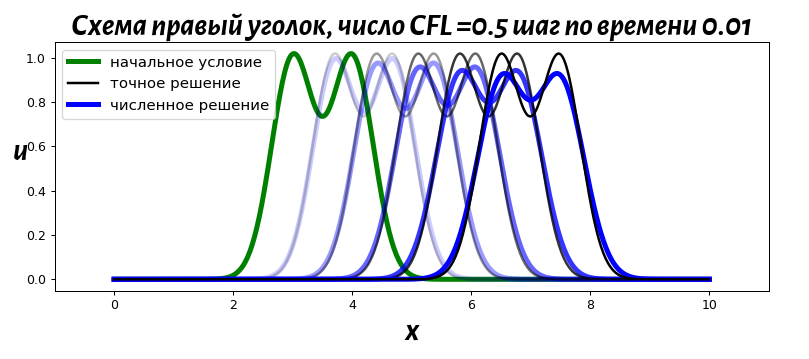

<IPython.core.display.Javascript object>


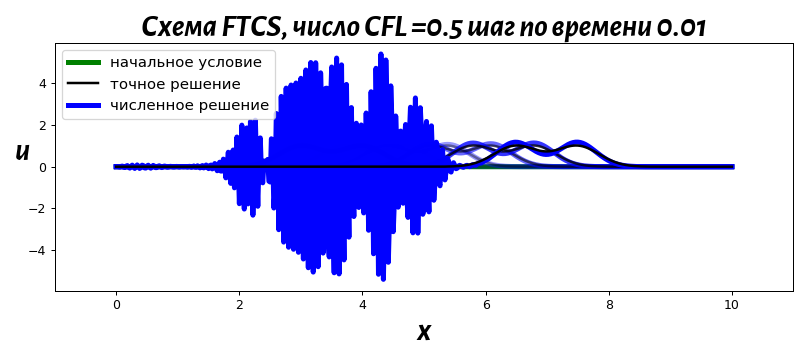

<IPython.core.display.Javascript object>


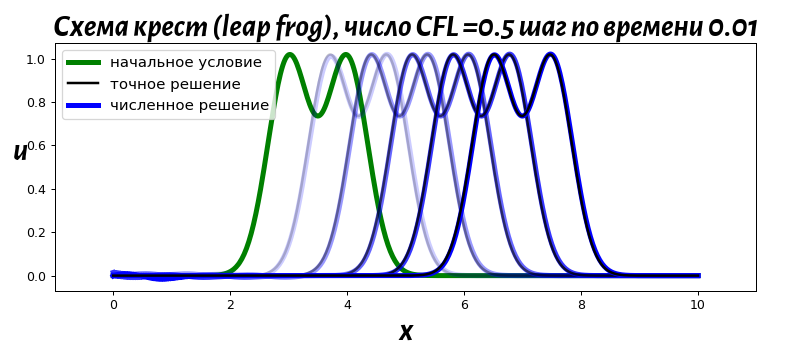

In [17]:
C = 0.5                 # число CFL
a = 1.0                 # скорость распространения возмущений
delta_t = C*delta_x/a   # dt = c*dx/a

#------------------------
# Расчет по явным схемам 
#------------------------

visualize(simple_upwind,'правый уголок', x, M, delta_t, C, a)
visualize(FTCS,'FTCS', x, M, delta_t, C, a)  
visualize(leap_frog,'крест (leap frog)', x, M, delta_t, C, a)  

&nbsp; Из визуализаций выше мы видим несколько интересных особенностей, проявляющихся при использовании схем $\eqref{eq:simple_upwind_forward}, \eqref{eq:FTCS}, \eqref{eq:leap_frog}$. Схема уголок (simple upwind) $\eqref{eq:simple_upwind_forward}$ дает довольно неплохой результат, однако со временем решение затухает. Данное поведение обусловлено свойством *численной диссипации*. При использовании схем обладающих диссипацией исходный профиль решения постепенно теряет амплитуду, а мелкие возмущения замазываются, как если бы в уравнении присутствовало вязкое слагаемое.

&nbsp; Использование схемы $\eqref{eq:FTCS}$ вообще не дает разумного результата, на левой границе решения возникают искусственные колебания, которые со временем нарастают и полностью искажают полученное решение. Данная особенность связана с *устойчивостью* разностной схемы. Использование неустойчивых схем приводит к неограниченному нарастанию гармоник Фурье спектра решения, что в конечном счете делает использование расчетной схемы невозможным. Большинство явных схем является *условно устойчивыми*, т.е. они устойчивы лишь в определенном диапазоне значений парамеров $\Delta x, \Delta t$ и $a$. К примеру разностные схемы уголок $\eqref{eq:simple_upwind_forward}$ и "крест" $\eqref{eq:leap_frog}$ потеряют свою устойчивость, если попробовать применить их при CFL > 1.   

&nbsp; Наконец решение, полученное по схеме "крест", является наиболее *точным* из рассмотренных, однако на левой границе решения также наблюдается генерация колебаний малой амплитуды. В отличие от колебаний, возникающих при использовании схемы $\eqref{eq:FTCS}$, в данном случае они не растут, что делает использование схемы "крест" приемлемым. Возникновение и распространение ложных мод в решении связано с *дисперсионными* свойствами схемы. В случае, если схема имеет численную дисперсию, разные гармоники решения начинают двигаться с разаными скоростями, что не соответствует свойствам решения исходного уравнения (все моды решения $\eqref{eq:linear_wave_eq}$ должны двигаться с одной и той же скоростью). В итоге решение как бы "расщепляется" из-за того что каждая гармоника движется со своей скоростью. В особенности это заметно в областях соответствующих суперпозиции многих волн, таких как мелкомасштабные неоднородности, разрывы и резкие перепады решения.

<IPython.core.display.Javascript object>


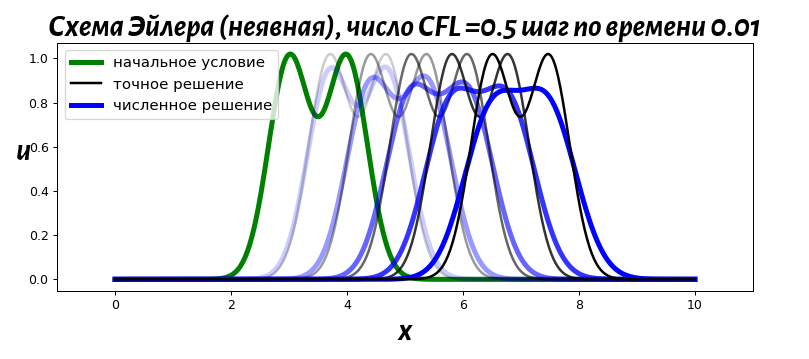

<IPython.core.display.Javascript object>


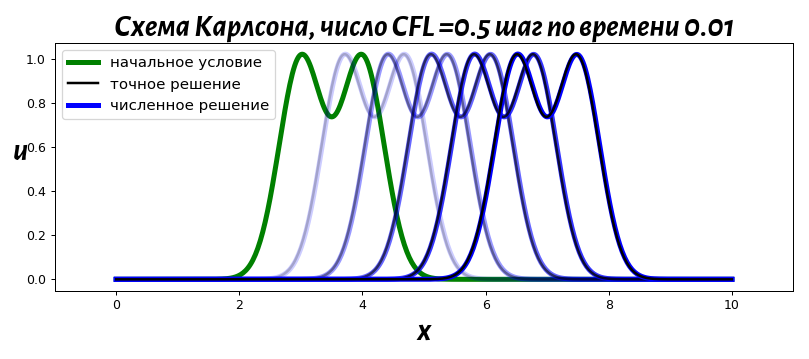

In [18]:
#----------------------------
# Расчет по неявным схемам 
#----------------------------
visualize(implicit_euler,'Эйлера (неявная)', x, M, delta_t, C, a) 
visualize(implicit_carlson,'Карлсона', x, M, delta_t, C, a) 

&nbsp; Из полученных графиков мы видим, что неявная схема уголок $\eqref{eq:implicit_simple_upwind}$ обладает диссипативными свойствами, в то время как схема Карлсона $\eqref{eq:Carlson}$ дает наилучший результат из всех рассмотренных нами схем решения линейного уравнения переноса $\eqref{eq:linear_wave_eq}$. Тем не менее, схема Карлсона также обладает аномальными диссипативными свойствами, что мы покажем позже. Рассмотренные нами неявные схемы обладают важным преимуществом - они безусловно устойчивы, вести расчет по ним можно при любых комбинациях параметров $\Delta t$, $\Delta x$ и $a$.

---

#### Задача 7
> Реализуйте процедуры `seq_implicit_euler(lBc, rBc, u, u_next, u_prev, C, t)`, `seq_implicit_carlson(lBc, rBc, u, u_next, u_prev, C, t)` в которых расчет проводится по схемам $\eqref{eq:implicit_simple_upwind}$ и $\eqref{eq:Carlson}$, однако вместо решения СЛАУ для нахождения $u^{n+1}$ применяются формулы бегущего счета. Визуализируйте решение с помощью функции `visualize(scheme,scheme_name, x, M, delta_t, C, a)`. 

---

&nbsp; Подводя итог, на примере явных схем $\eqref{eq:simple_upwind_forward}, \eqref{eq:FTCS}, \eqref{eq:leap_frog}$ и неявных схем $\eqref{eq:implicit_simple_upwind},\eqref{eq:Carlson}$ мы смогли продемонстрировать несколько важных свойств разностных схем, таких как *точность*, *устойчивость*, *диссипативность* и *дисперсия*. Каждое из этих свойств далее мы обсудим отдельно и покажем как определить их наличие и влияние на решение при использовании тех или иных разностных схем.  

<a id = "s_sec10"></a>
### 10. Интерполяционно-характеристический метод.

&nbsp; Одним из наиболее наглядных способов построения конечно-рaзностных схем является так называемый *интерполяционно-характеристического* метод или метод *обратной характеристики*. Как мы показали выше, решение уравнения $\eqref{eq:linear_wave_eq}$ остается постоянным на характеристиках. Проведем через узел $(i,n+1)$ характеристику и найдем точку её пересечения с временным слоем $t^n$ (точка A на [Рисунке 4](#figure4)). В случае, если $0 \le C \le 1$ Точка A находится между узлами $(i,n)$ и $(i-1,n)$. Расстояние от правого узла до точки A равно $C\Delta x$, от левого - $(1-C)\Delta x$, $x_A = x_i - C \Delta x$. Так как решение на характеристике постоянно, то $u^{n+1}_i=u(x_A,t_n)$. Значение функции в точке А, $u(x_A,t_n)$, мы можем аппроксимировать интерполяционной формулой по известным её значениям в узлах на временном слое $t_n$.

<a id = "figure4"></a>

<img src="Pic4.jpg" alt="drawing" width="500"/>

<center> Рисунок 4. Интерполяционно-характеристический метод построения конечно-разностных схем для линейного уравнения переноса $\eqref{eq:linear_wave_eq}$. </center>

<a id = "example_5"></a>
#### Пример 5. 
> Применим интерполяционно-характеристический метод для построения схемы с помощью простейшей, линейной интерполяции на слое $t_n$.

&nbsp; Используя линейную интерполяцию мы можем вычислить $u(x_A,t_n)$ по двум ближайшим точкам $(i-1,n)$ и $(i,n)$:

\begin{equation*}
u^{n+1}_i=u(x_A,t_n)=Cu^n_{i-1} + (1-C)u^n_i
\end{equation*}

&nbsp; Или, раскрывая $C$:

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^n_i - u^n_{i-1}}{\Delta x}
\label{eq:upwind_scheme}
\end{equation}

&nbsp; Мы получили уже известную нам схему *уголок*. Шаблон данной схемы изображен на [Рисунке 3](#figure3)а. 

&nbsp; Мы можем повысить точность аппроксимации $u(x_A,t_n)$ используя квадратичную интерполяцию. Для неё нам понадобится уже три точки. Выберем в качестве таковых узлы сетки с индексами $(i-1,n)$, $(i,n)$, $(i+1,n)$ и построим интерполяционный полином Лагранжа второй степени (см.[рис. 5](#figure5)а):

\begin{equation*}
u^{n+1}_i = u(x_A,t_n)=u^n_{i-1}P_{i-1}(x_A) + u^n_i P_{i}(x_A) + u^n_{i+1} P_{i+1}(x_A)
\end{equation*}

где 
\begin{equation*}
P_{i-1}(x) = \frac{(x-x_i)(x-x_{i+1})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1})}
\end{equation*}
\begin{equation*}
P_{i}(x) = \frac{(x-x_{i-1})(x-x_{i+1})}{(x_i-x_{i-1})(x_i-x_{i+1})}
\end{equation*}
\begin{equation*}
P_{i+1}(x) = \frac{(x-x_i)(x-x_{i-1})}{(x_{i+1}-x_i)(x_{i+1}-x_{i-1})}
\end{equation*}

&nbsp; Подставляя данные выражения, получим разностную схему Лакса-Вендроффа [[2]](#foot2).

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{u^n_{i+1} - u^n_{i-1}}{2\Delta x} + \frac{a^2\Delta t}{2}\frac{u^n_{i-1} - 2u^n_{i} + u^n_{i+1}}{\Delta x^2} 
\label{eq:Lax_Wendroff_scheme}
\end{equation}

&nbsp; Схему Лакса-Вендроффа можно записать в двухэтапной форме. На первом этапе, по схеме Лакса вычисляются промежуточные значения $u^{n+1/2}_{i+1/2}$ в центрах ячеек:

\begin{equation}
\frac{u^{n+1/2}_{i+1/2} - 0.5(u^n_{i+1} + u^n_{i-1})}{0.5\Delta t} = - a \frac{u^n_{i+1} - u^n_{i}}{\Delta x} 
\label{eq:Lax_scheme}
\end{equation}

&nbsp; На втором этапе по схеме "крест" рассчитываются неизвестные значения функции на новом временном слое:

\begin{equation}
\frac{u^{n+1}_{i} - u^n_{i}}{\Delta t} = - a \frac{u^n_{i+1/2} - u^n_{i-1/2}}{\Delta x} 
\label{eq:staggered_leap_frog_scheme}
\end{equation}

&nbsp; Используем для построения интерполяционного квадратичного полинома узлы с индексами $(i-2,n)$, $(i-1,n)$, $(i,n)$ (см.[рис. 5](#figure5)б). В этом случае интерполяция дает 

\begin{equation*}
u^{n+1}_i = u(x_A,t_n)=u^n_{i-2}P_{i-2}(x_A) + u^n_{i-1} P_{i-1}(x_A) + u^n_{i} P_{i}(x_A)
\end{equation*}

где 
\begin{equation*}
P_{i-2}(x) = \frac{(x-x_i)(x-x_{i-1})}{(x_{i-2}-x_i)(x_{i-2}-x_{i-1})}
\end{equation*}
\begin{equation*}
P_{i-1}(x) = \frac{(x-x_i)(x-x_{i+1})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1})}
\end{equation*}
\begin{equation*}
P_{i}(x) = \frac{(x-x_{i-1})(x-x_{i+1})}{(x_i-x_{i-1})(x_i-x_{i+1})}
\end{equation*}

&nbsp; Подставляя координаты узлов $x_i$ и рассчитывая в точке $x=x_A$ получаем:

\begin{equation*}
P_{i-2}(x_A) = 0.5 C (1-C)
\end{equation*}
\begin{equation*}
P_{i-1}(x_A) = C (2 - C)
\end{equation*}
\begin{equation*}
P_{i}(x_A) = 1-C+0.5C(1-C)
\end{equation*}

&nbsp; Подставляя в интерполяционную формулу приходим к разностной схеме Бима-Уорминга [[3]](#foot3):

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - a \frac{3u^n_{i} - 4u^n_{i-1} + u^n_{i-2}}{\Delta x} + \frac{a\Delta x C}{2}\frac{u^n_{i} - 2u^n_{i-1} + u^n_{i-2}}{\Delta x^2} 
\label{eq:Beam_Warming_scheme}
\end{equation}

&nbsp; Можно и дальше повышать число узлов на текущем временном слое тем самым повышая порядок полиномов Лагранжа, порядок аппоркимации при этом также будет увеличиваться.

Чтобы с помощью метода обратной характеристики строить схемы задействующие узлы на нескольких временных слоях необходимо снести значения из этих узлов по характеристикам. Построим например схему Карлсона ([Рис. 3](#figure3)г). Построим точку B пересечения характеристики из узла $(i-1,n+1)$ с текущим временным слоем $n$: $x_B=(i-1)\Delta x -C\Delta x$ и снесем в неё значение сеточной функции из узла $(i-1,n+1)$: $u(x_B,t_n)=u^{n+1}_{i-1}$ (см.[рис. 5](#figure5)в). Теперь включим это значение в интерполяционную формулу для квадратичной интерполяции:

\begin{equation*}
u^{n+1}_i = u(x_A,t_n)=u^{n+1}_{i-1}P_B(x_A) + u^n_{i-1} P_{i-1}(x_A) + u^n_{i} P_{i}(x_A)
\end{equation*}

\begin{equation*}
P_{B}(x) = \frac{(x-x_{i-1})(x-x_{i})}{(x_{B}-x_{i-1})(x_{B}-x_{i})}
\end{equation*}
\begin{equation*}
P_{i-1}(x) = \frac{(x-x_{B})(x-x_{i})}{(x_{i-1}-x_{B})(x_{i-1}-x_{i})}
\end{equation*}
\begin{equation*}
P_{i}(x) = \frac{(x-x_{B})(x-x_{i-1})}{(x_i-x_{B})(x_i-x_{B})}
\end{equation*}

&nbsp; Подставляя координаты узлов $x_i$, точки $x_B$ и рассчитывая в точке $x=x_A$ получаем:

\begin{equation*}
P_{B}(x_A) = -\frac{1-C}{1+C}
\end{equation*}
\begin{equation*}
P_{i-1}(x_A) = 1
\end{equation*}
\begin{equation*}
P_{i}(x_A) = \frac{1-C}{1+C}
\end{equation*}

&nbsp; Для построения трехслойных схем на временной слой $n$ сносится значение сеточной функции со слоя $n-1$. Пример построения схемы "крест" приведен на [Рисунке 5](#figure5)г. Особый интерес представляет трехслойная разностная схема "КАБАРЕ" [[4]](#foot4) или схема Айзерлиса (upwind leapfrog) (см.[рис. 5](#figure5)д). Она строится путем сноса в точку B значения из узла $(i-1,n-1)$, при этом координата $x_B = x_{i-1}+C \Delta x$:

\begin{equation*}
u^{n+1}_i = u(x_A,t_n)=u^{n-1}_{i-1}P_B(x_A) + u^n_{i-1} P_{i-1}(x_A) + u^n_{i} P_{i}(x_A)
\end{equation*}

\begin{equation*}
P_{B}(x) = \frac{(x-x_{i-1})(x-x_{i})}{(x_{B}-x_{i-1})(x_{B}-x_{i})} \Rightarrow P_{B}(x_A) = 1
\end{equation*}
\begin{equation*}
P_{i-1}(x) = \frac{(x-x_{B})(x-x_{i})}{(x_{i-1}-x_{B})(x_{i-1}-x_{i})} \Rightarrow P_{i-1}(x_A) = -1 + 2C 
\end{equation*}
\begin{equation*}
P_{i}(x) = \frac{(x-x_{B})(x-x_{i-1})}{(x_i-x_{B})(x_i-x_{B})} \Rightarrow P_{i}(x_A) = 1 - 2C
\end{equation*}

&nbsp; В итоге получаем следующее разностное соотношение.
\begin{equation}
\frac{1}{2}\left(\frac{u^{n+1}_i - u^n_i}{\Delta t} + \frac{u^{n}_{i-1} - u^{n-1}_{i-1}}{\Delta t} \right) = - a \frac{u^n_{i} - u^n_{i-1}}{\Delta x}
\label{eq:cabaret}
\end{equation}

&nbsp; Схема "КАБАРЕ" обладает рядом положительных особенностей, которые делают её применение перспективным направлением в современной вычислительной физике. Работа над расчетными методиками на базе схемы "КАБАРЕ" сегодня интенсивно ведется в лабораториях ИБРАЭ РАН и ВМК МГУ под руководством Головизнина В.М. Позже мы проанализируем эту схему, на равне с другими схемами, приведенными в этой лекции, а также рассмотрим алгоритмы решения задач газовой динамики на основе схемы "КАБАРЕ". 

---

#### Задача 8
> Реализуйте процедуры `Lax-Wendroff(lBc, rBc, u, u_next, u_prev, C, t)`, `CABARET(lBc, rBc, u, u_next, u_prev, C, t)` в которых расчет проводится по схемам $\eqref{eq:Lax_Wendroff_scheme}$ и $\eqref{eq:cabaret}$,  Визуализируйте решение с помощью функции `visualize(scheme,scheme_name, x, M, delta_t, C, a)`. 

---

<a id = "foot2"></a> <sub>[2]: Lax P.D., Wendroff D. // Commun. Pure Appl. Math. 1960, 13 (2): 217–237. [doi:10.1002/cpa.3160130205](https://onlinelibrary.wiley.com/doi/abs/10.1002/cpa.3160130205).</sub>  
<a id = "foot3"></a> <sub>[3]:  Richard M Beam, R.F Warming // Journal of Computational Physics. 1976, 22 (1): 87–110. [doi:10.1016/0021-9991(76)90110-8](https://www.sciencedirect.com/science/article/pii/0021999176901108?via%3Dihub).</sub>  
<a id = "foot4"></a> <sub>[4]:  Головизнин В.М., Самарский А.А. // Математическое моделирование. 1998, 10 (1): 86–100. [Math-Net.Ru](http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=mm&paperid=1241&option_lang=rus).</sub>

<a id = "figure5"></a>

<img src="Pic5.jpg" alt="drawing" width="800"/>

<center> Рисунок 5. Построение разностных схем интерполяционно-характеристическим методом. </center>

&nbsp; Не составляет труда реализовать интерполяционно-характеристический метод с помощью возможностей символьных вычислений **SymPy**, в частности мы будем использовать функцию [`interpolating_poly`](https://docs.sympy.org/latest/modules/polys/reference.html) для генерации интерполяционных полиномов Лагранжа и средства упрощения алгебраических выражений[`simplify`, `collect`, `substitute`, `expand`](https://docs.sympy.org/latest/tutorial/simplification.html):

In [10]:
import numpy as np

from sympy import  symbols, factor, expand, collect
from sympy.polys.specialpolys import interpolating_poly

from IPython.display import display, Math

i,dx = symbols("i,dx")                          # i - индекс узла, dx - пространственный шаг
x_i,x_ip,x_im = symbols("x_i,x_ip,x_im")        # x - пространственная переменная, x_i - к-та узла i,
                                                # x_ip - к-та узла i+1, x_im - к-та узла i-1
x_i2p, x_i2m = symbols("x_i2p, x_i2m")          # x_i2p - к-та узла i+2, x_i2m - к-та узла i-2
u_in, u_ipn, u_imn, u_inp = symbols("u_in, u_ipn, u_imn, u_inp") # u_in - u в узле i,n; u_ipn - u в узле i+1,n 
                                                                 # u_imn - u в узле i-1,n; u_inp - u в узле i,n+1  
u_i2pn, u_i2mn = symbols("u_i2pn, u_i2mn") # u_i2pn - u в узле i+2,n; u_i2mn - u в узле i-2,n
u_imnp, u_imnm = symbols("u_imnp,u_imnm")  # u_imnp - u в узле i-1,n+1; u_imnm - u в узле i-1,n-1
x_A, x_B, C, a, dt = symbols("x_A,x_B, C,a,dt") # x_A - к-та точки A, x_B - к-та точки B.

x_i = i*dx
x_ip = (i+1)*dx
x_im = (i-1)*dx
x_i2p = (i+2)*dx
x_i2m = (i-2)*dx

x_B = x_im - C*dx
x_A = x_i - C*dx

def interpolation_scheme(x_list,y_list,x_A,scheme_name):
    x = symbols('x') # x - пространственная переменная
    n = len(x_list)  # n - число узлов для интерполяции / порядок полинома Лагранжа
    interpolation = interpolating_poly(n,x,x_list,y_list) # генерируем полином Лагранжа порядка n по точкам
                                                          # (x[1],y[1]), (x[2],y[2]) и т.д.
    interpolation = interpolation.subs(x,x_A)             # подстановка x = x_A 
    interpolation = ((interpolation - u_inp)/dt)          # вычитаем u_inp и делим на dt
    interpolation = interpolation.simplify().expand()     # упрощаем и раскрываем скобки
    interpolation = collect(interpolation,C)              # собираем слагаемые с одинаковой степенью при C
    display('Конечно-разностная схема '+scheme_name+ ': ', interpolation)

interpolation_scheme([x_im,x_i],[u_imn, u_in],x_A,'Уголок')    
interpolation_scheme([x_im,x_i,x_ip],[u_imn, u_in, u_ipn],x_A,'Лакса-Вендроффа')    
interpolation_scheme([x_i2m,x_im,x_i],[u_i2mn, u_imn, u_in],x_A,'Бима-Уорминга') 
interpolation_scheme([x_B,x_im,x_i],[u_imnp, u_imn, u_in],x_A,'Карлсона') 

x_B = x_im + C*dx
interpolation_scheme([x_B,x_im,x_i],[u_imnm, u_imn, u_in],x_A,'КАБАРЕ') 

'Конечно-разностная схема Уголок: '

C*(u_imn/dt - u_in/dt) + u_in/dt - u_inp/dt

'Конечно-разностная схема Лакса-Вендроффа: '

C**2*(u_imn/(2*dt) - u_in/dt + u_ipn/(2*dt)) + C*(u_imn/(2*dt) - u_ipn/(2*dt)) + u_in/dt - u_inp/dt

'Конечно-разностная схема Бима-Уорминга: '

C**2*(u_i2mn/(2*dt) - u_imn/dt + u_in/(2*dt)) + C*(-u_i2mn/(2*dt) + 2*u_imn/dt - 3*u_in/(2*dt)) + u_in/dt - u_inp/dt

'Конечно-разностная схема Карлсона: '

C*(u_imn/(C*dt + dt) + u_imnp/(C*dt + dt) - u_in/(C*dt + dt) - u_inp/(C*dt + dt)) + u_imn/(C*dt + dt) - u_imnp/(C*dt + dt) + u_in/(C*dt + dt) - u_inp/(C*dt + dt)

'Конечно-разностная схема КАБАРЕ: '

C*(2*u_imn/dt - 2*u_in/dt) - u_imn/dt + u_imnm/dt + u_in/dt - u_inp/dt

## Приложение.

<a id = "s_app1"></a>
### Классификация уравнений в частных производных

&nbsp; Наиболее простым подходом к классификации уравнений в частных производных второго порядка является аналогия с коническими сечениями. Общий вид линейного уравнения второго порядка от двух назависимых переменных записывается следующим образом:
\begin{equation}
au_{xx} + bu_{xy} + cu_{yy} + d u_x + e u_y + f u = g 
\label{classification}
\end{equation}

&nbsp; В то же время, конические сечения в декартовой системе координат описываются следующим квадратным многочленом, так что налицо сходство между этими двумя математическими выражениями. 

\begin{equation}
A x^2 + B xy + C y^2 + D x + E y + F = 0 
\label{conic}
\end{equation}

&nbsp; К какому конкретно типу принадлежит уравнение можно определить по знаку дискриминанта:

\begin{equation}
    b^2 - 4ac =
    \begin{cases}
      < 0 & \rightarrow \text{эллиптическое}\\
      = 0 & \rightarrow \text{параболическое} \\
      > 0 & \rightarrow \text{гиперболическое}
    \end{cases}
\end{equation}

&nbsp; Названия совпадают с названиями конических сечений:

In [11]:
from IPython.display import IFrame
IFrame("https://www.geogebra.org/classic/ynwdvkdf",960,800)

&nbsp; Каноническими примерами являются эллиптическое уравнение Пуассона ($u_{xx} + u_{yy}=g$), параболическое уравнение теплопроводности ($u_{t} = \kappa u_{xx}$, $\kappa > 0$), гиперболическое волновое уравнение ($u_{tt} = c^2 u_{xx}$). Эти уравнения описывают различные явления и требуют разных методик решения. Удобство классификации заключается в том, что моделирование физических явлений, описываемых одним и тем же классом уравнений, может быть выполнено одними и теми же методиками. С этой точки зрения, задачей вычислительной физики и прикладной математики является разрботка надежных методов решения трех классов уравнений: эллиптических, параболических и гиперболических.  

<a id = "s_app1"></a>
### Гиперблические уравнения и законы сохранения

&nbsp; В рамках данного курса нас будут больше всего интересовать гиперболические уравнения и системы гиперболических уравнений. Как правило именно с такими системами уравнений приходится работать при моделировании механики сплошной среды. Волновое уравнение второго порядка $u_{tt} = c^2 u_{xx}$ естественным образом может быть представлено в виде системы их двух уравнений первого порядка:

\begin{equation*}
u_{tt} - c^2 u_{xx} = \left(\frac{\partial}{\partial t^2} - c^2\frac{\partial}{\partial x^2} \right)u = 
\left(\frac{\partial}{\partial t} - c \frac{\partial}{\partial x} \right)\left(\frac{\partial}{\partial t} + c\frac{\partial}{\partial x} \right)u = 0
\end{equation*}

или

\begin{equation*}
\left(\frac{\partial}{\partial t} - c\frac{\partial}{\partial x} \right)u = 0 \\
\left(\frac{\partial}{\partial t} + c\frac{\partial}{\partial x} \right)u = 0
\end{equation*}

&nbsp; При $c>0$ первое уравнение описывает распространение волн слева на право, второе - в обратную сторону.

&nbsp; Линейная задача с одной пространственной координатой может быть представлена в виде системы:
\begin{equation*}
u_t + A u_x = 0 
\end{equation*}

где $u(x,t) \in \mathbb{R}^s$, а $A$ - матрица $s \times s$. Задача является гиперболической, если $A$ имеет действительные собственные значения и диагонализуема, т.е. имеет полный набор линйно независимых собственных векторов. При выполнении этих условий, решением системы может быть представлено в виде набора волн, что соответствует физическим явлениям, которые описываются гиперболическими уравнениями и системами. 
Простейший пример гиперболического уравнения - уравнение адвекции:

\begin{equation*}
u_t + a u_x = 0 
\end{equation*}

&nbsp; Другим важным примером гиперболического уравнения (квазилинейное уравнение) является уравнение Хопфа или невязкое уравнение Бюргерса:

\begin{equation*}
u_t + u u_x = 0 
\end{equation*}

здесь скорость переноса определяется самой переносимой величиной, что ведет к возникновению таких интересных особенностей, как решения с разрывом - ударные волны. 

&nbsp; В качестве примера простой гиперболической системы можно привести линеаризованную систему уравнений акустики, возникающую при решении задач упругости или газовой динамики:

\begin{equation*}
 \begin{bmatrix}
p \\
u
 \end{bmatrix}_t +  
 \begin{bmatrix}
0 & \kappa_0 \\
1/\rho_0 & 0
 \end{bmatrix}
 \begin{bmatrix}
p \\
u
 \end{bmatrix}_x = 0
\end{equation*}

&nbsp; Здесь $p$ и $u$ - возмущения давления и скорости, $\rho_0$ плотность, $\kappa_0$ - объемный модуль упругости среды. Данную систему легко свести к волновому уравнению:

\begin{equation*}
p_{tt} = c^2 p_{xx}
\end{equation*} 

где $c=\sqrt{\kappa_0 / \rho_0}$ - скорость звука в среде.

&nbsp; Многие уравнения в частных производных являются математическим представлением тех или иных законов сохранения. Рассмотрим например процесс переноса среды в потоке с постоянной скоростью $a$, тогда поток среды будет определятся следующей *функцией потока*:

\begin{equation*}
f(\rho) = a \rho
\end{equation*} 

&nbsp; Локальная плотность $\rho(x,t)$ (скажем в кг/м) умножается на скорость (м/с), что дает поток среды протекающий через точку $x$ в единицу времени (кг/с).
Если рассмотреть отрезок $[x_1,x_2]$, то масса в нем может изменяться только в результате втока или вытока с границ. Тогда

\begin{equation*}
\frac{d}{dt}\int_{x_1}^{x_2} \rho(x,t)dx = f(\rho(x_1,t)) - f(\rho(x_2,t))
\end{equation*} 

&nbsp; Знак минуса в правой части определяет направление течения, слева на право. Если предположить, что $\rho$ и $f$ - гладкие функции, тогда уравнени может быть переписано:

\begin{equation*}
\frac{d}{dt}\int_{x_1}^{x_2} \rho(x,t)dx = \int_{x_1}^{x_2} \frac{\partial}{\partial x} f(\rho(x,t)) dx
\end{equation*} 

или

\begin{equation*}
\int_{x_1}^{x_2} \left[ \frac{\partial }{\partial t} \rho(x,t) - \frac{\partial }{\partial x} f(\rho(x,t)\right] dx
\end{equation*}

&nbsp; Так как интеграл должен быть равен нулю для любых значений $x_1$ и $x_2$, подынтегральное выражение должно быть равно нулю. В результате приходим к уравнению:

\begin{equation}
\frac{\partial }{\partial t} \rho(x,t) - \frac{\partial }{\partial x} f(\rho(x,t) = 0
\label{eq:conservation_law}
\end{equation}

&nbsp; Уравнение $\eqref{eq:conservation_law}$ называется *законом сохранения* или *дивергентной формой* уравнения переноса с потоковой функцией $f(x,t)$.

## Список литературы.

1. "Finite Difference Methods for Ordinary and Partial Differential Equations" *Randall J. LeVeque* ([SIAM](https://faculty.washington.edu/rjl/fdmbook/), 2007).
2. "Atmospheric and Oceanic Modeling" MIT Course by *Alistair Adcroft* ([MIT Open Courseware](https://ocw.mit.edu/courses/earth-atmospheric-and-planetary-sciences/12-950-atmospheric-and-oceanic-modeling-spring-2004/index.htm)).
3. "Finite Difference Schemes and Partial Differential Equations" *John C. Strikwerda* ([SIAM](https://doi.org/10.1137/1.9780898717938), 2004)
4. "Basic Numerical Methods in Meteorology and Oceanography" *Kristofer Doos and Peter Lundberg* ([Meteorologiska Institutionen (pdf)](http://doos.misu.su.se/pub/numerical_methods.pdf), 2018)
5. "Численные методы, используемые в атмосферных моделях" *Ф. Мезингер, А. Аракава* (Пер. с англ. "Numerical models used in atmospheric models" *F. Mesinger, A. Arakawa*) .
6. "Дисперсионные и диссипативные характеристики разностных схем для уравнений в частных производных гиперболического типа" *В.М. Головизнин, А.В. Соловьев* ([МГУ ВМК](http://lim.cmc.msu.ru/index.php?id=9), 2018)
7. "Finite Difference Computing with PDEs - A Modern Software Approach" *Hans Petter Langtangen, Svein Linge* ([github.com (pdf)](https://hplgit.github.io/fdm-book/doc/pub/book/pdf/fdm-book-4screen.pdf), 2016)
8. Онлайн курс "Computers, Waves, Simulations: A practical introduction to Numerical methods using Python." *Heiner Igel* ([Coursera.org](https://www.coursera.org/learn/computers-waves-simulations))

---
**Ячейка снизу загружает стилевую конфигурацию блокнота.**

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()